In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/water quality prediction/Water/water_quality.csv')

In [ ]:
data.fillna(0, inplace=True)
data.head(5)

,SL,DISTRICT,UPAZILA,WELL ID,OLD ID,DATETIME,year,TEMPERATURE,PH,TDS,CALCIUM,MAGNESIUM,SODIUM,POTASSIUM,CHLORIDE,BICARBONATE,SULPHATE,NITRATE,IRON,MANGANESE,BORON,SILICA,FLUORIDE,CARBONDIOXIDE
0,134,Chattogram,Satkania,GQ1582095,CHWQ095,06/12/2019,2019,26.4,6.67,534.0,32.05,17.85,285.43,3.38,25.2,60.0,2.0,0.4,0.49,0.58,0.83,49.23,0.23,69
1,133,Chattogram,Satkania,GQ1582095,CHWQ095,30/11/2019,2019,26.2,9.08,375.2,32.35,17.81,285.01,3.26,13.8,90.0,1.0,0.4,0.56,0.59,0.83,49.25,0.66,68
2,132,Chattogram,Satkania,GQ1582095,CHWQ095,21/10/2019,2019,26.3,7.05,508.9,32.20,18.36,286.98,3.12,40.1,200.0,1.0,0.3,1.95,0.6,0.84,50.25,0.61,66
3,131,Chattogram,Satkania,GQ1582095,CHWQ095,21/09/2019,2019,26.1,7.70,668.5,32.15,18.02,286.80,3.05,52.2,80.0,5.0,0.2,2.61,0.06,0.86,47.50,0.51,65
4,130,Chattogram,Satkania,GQ1582095,CHWQ095,21/08/2019,2019,27.3,7.40,570.5,32.05,17.92,284.70,3.02,52.9,55.0,5.0,0.3,2.05,0.07,0.87,47.62,0.58,69


In [ ]:
data.dtypes

SL                 int64
DISTRICT          object
UPAZILA           object
WELL ID           object
OLD ID            object
DATETIME          object
year               int64
TEMPERATURE      float64
PH               float64
TDS              float64
CALCIUM          float64
MAGNESIUM        float64
SODIUM           float64
POTASSIUM        float64
CHLORIDE         float64
BICARBONATE      float64
SULPHATE         float64
NITRATE          float64
IRON             float64
MANGANESE         object
BORON             object
SILICA           float64
FLUORIDE          object
CARBONDIOXIDE      int64
dtype: object

In [ ]:
#conversions
data['TEMPERATURE']=pd.to_numeric(data['TEMPERATURE'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['TDS']=pd.to_numeric(data['TDS'],errors='coerce')
data['CALCIUM']=pd.to_numeric(data['CALCIUM'],errors='coerce')
data['MAGNESIUM']=pd.to_numeric(data['MAGNESIUM'],errors='coerce')
data['SODIUM']=pd.to_numeric(data['SODIUM'],errors='coerce')
data['POTASSIUM']=pd.to_numeric(data['POTASSIUM'],errors='coerce')
data['CHLORIDE']=pd.to_numeric(data['CHLORIDE'],errors='coerce')
data['BICARBONATE']=pd.to_numeric(data['BICARBONATE'],errors='coerce')
data['SULPHATE']=pd.to_numeric(data['SULPHATE'],errors='coerce')
data['NITRATE']=pd.to_numeric(data['NITRATE'],errors='coerce')
data['IRON']=pd.to_numeric(data['IRON'],errors='coerce')
data['MANGANESE']=pd.to_numeric(data['MANGANESE'],errors='coerce')
data['BORON']=pd.to_numeric(data['BORON'],errors='coerce')
data['SILICA']=pd.to_numeric(data['SILICA'],errors='coerce')
data['FLUORIDE']=pd.to_numeric(data['FLUORIDE'],errors='coerce')
data['CARBONDIOXIDE']=pd.to_numeric(data['CARBONDIOXIDE'],errors='coerce')
data.dtypes

SL                 int64
DISTRICT          object
UPAZILA           object
WELL ID           object
OLD ID            object
DATETIME          object
year               int64
TEMPERATURE      float64
PH               float64
TDS              float64
CALCIUM          float64
MAGNESIUM        float64
SODIUM           float64
POTASSIUM        float64
CHLORIDE         float64
BICARBONATE      float64
SULPHATE         float64
NITRATE          float64
IRON             float64
MANGANESE        float64
BORON            float64
SILICA           float64
FLUORIDE         float64
CARBONDIOXIDE      int64
dtype: object

In [ ]:
data.describe()

,SL,year,TEMPERATURE,PH,TDS,CALCIUM,MAGNESIUM,SODIUM,POTASSIUM,CHLORIDE,BICARBONATE,SULPHATE,NITRATE,IRON,MANGANESE,BORON,SILICA,FLUORIDE,CARBONDIOXIDE
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.00000,144.000000,144.000000,144.000000,144.000000,144.000000,143.000000,142.000000,144.000000,143.000000,144.000000
mean,74.152778,2016.333333,28.770903,7.067639,513.909028,54.625000,19.308056,131.406250,12.98375,147.765764,248.082986,3.986111,2.729167,2.179167,0.167273,0.686972,32.498472,0.590629,84.909722
std,42.215948,2.061977,1.348065,0.613573,309.117889,23.818253,11.456478,112.476497,10.10336,153.884049,148.450385,2.116216,1.902326,2.011330,0.202318,1.141380,10.072393,0.541236,34.737761
min,1.000000,2014.000000,25.600000,3.700000,53.000000,30.000000,10.120000,3.000000,1.20000,4.100000,18.000000,0.000000,0.100000,0.010000,0.010000,0.000000,22.300000,0.000000,20.000000
25%,38.750000,2014.000000,28.037500,6.530000,324.750000,32.800000,11.750000,31.200000,3.68000,41.875000,147.750000,3.000000,1.375000,0.600000,0.065000,0.137500,24.015000,0.220000,60.000000
50%,74.500000,2016.000000,28.950000,7.185000,502.700000,42.600000,13.610000,94.330000,11.77000,67.500000,221.500000,5.000000,2.000000,0.955000,0.110000,0.430000,28.745000,0.350000,75.000000
75%,110.250000,2019.000000,29.727500,7.462500,712.500000,83.100000,25.302500,281.587500,19.23000,242.562500,375.250000,5.100000,4.542500,4.352500,0.150000,0.810000,42.230000,1.100000,117.500000
max,146.000000,2019.000000,31.500000,9.080000,1129.000000,90.400000,60.000000,295.750000,40.00000,479.000000,625.000000,9.000000,6.890000,5.600000,0.960000,6.000000,50.250000,2.410000,150.000000


# Bangladesh Standards (mg/L) (SN)
### Parameters SN Ideal Value
#### TDS |	500.00    |    0 
#### SULPHATE |	400.00    |    0 
#### SODIUM |	200.00    |    0 
#### SILICA |	30.00    |    0 
#### POTASSIUM |	12.00     |   0 
#### PH |	8.5    |    7
#### NITRATE |	10.00   |      0 
#### MANGANESE |	0.50     |   0 
#### MAGNESIUM	30.00   |     0 
#### IRON |	1.00        0 
#### FLUORIDE |	1.00     |   0 
#### CHLORIDE |	150.00   |     0 
#### CARBONDIOXIDE |	10.00    |    0 
#### CALCIUM	| 75.00    |    0 
#### BORON	1.00   |     0 
#### BICARBONATE |	183.00  |      0 

# 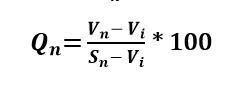

In [ ]:
data['qn_tds']= (data.TDS / 500) * 100
data['qn_sulphate']= (data.SULPHATE /400) * 100
data['qn_sodium']= (data.SODIUM / 200) * 100
data['qn_silica']= (data.SILICA / 30) * 100
data['qn_potassium']= (data.POTASSIUM / 12) * 100
data['qn_pH']= abs(((data.PH - 7) / 8.5 - 7)) * 100
data['qn_nitrate']= (data.NITRATE / 10) * 100
data['qn_MANGANESE']= (data.MANGANESE / 0.5) * 100
data['qn_MAGNESIUM']= (data.MAGNESIUM / 30) * 100
data['qn_IRON']=( data.IRON / 1) * 100
data['qn_FLUORIDE']= (data.FLUORIDE / 1) * 100
data['qn_CHLORIDE']= (data.CHLORIDE /150) * 100
data['qn_CARBONDIOXIDE']= (data.CARBONDIOXIDE / 10) * 100
data['qn_CALCIUM']= (data.CALCIUM / 75) * 100
data['qn_BORON']= (data.BORON/ 1) * 100
data['qn_BICARBONATE']= (data.BICARBONATE / 183 ) * 100
data

,SL,DISTRICT,UPAZILA,WELL ID,OLD ID,DATETIME,year,TEMPERATURE,PH,TDS,CALCIUM,MAGNESIUM,SODIUM,POTASSIUM,CHLORIDE,BICARBONATE,SULPHATE,NITRATE,IRON,MANGANESE,BORON,SILICA,FLUORIDE,CARBONDIOXIDE,qn_tds,qn_sulphate,qn_sodium,qn_silica,qn_potassium,qn_pH,qn_nitrate,qn_MANGANESE,qn_MAGNESIUM,qn_IRON,qn_FLUORIDE,qn_CHLORIDE,qn_CARBONDIOXIDE,qn_CALCIUM,qn_BORON,qn_BICARBONATE
0,134,Chattogram,Satkania,GQ1582095,CHWQ095,06/12/2019,2019,26.4,6.67,534.0,32.05,17.85,285.43,3.38,25.2,60.0,2.0,0.40,0.49,0.58,0.83,49.23,0.23,69,106.80,0.50,142.715,164.100000,28.166667,703.882353,4.0,116.0,59.500000,49.0,23.0,16.800000,690.0,42.733333,83.0,32.786885
1,133,Chattogram,Satkania,GQ1582095,CHWQ095,30/11/2019,2019,26.2,9.08,375.2,32.35,17.81,285.01,3.26,13.8,90.0,1.0,0.40,0.56,0.59,0.83,49.25,0.66,68,75.04,0.25,142.505,164.166667,27.166667,675.529412,4.0,118.0,59.366667,56.0,66.0,9.200000,680.0,43.133333,83.0,49.180328
2,132,Chattogram,Satkania,GQ1582095,CHWQ095,21/10/2019,2019,26.3,7.05,508.9,32.20,18.36,286.98,3.12,40.1,200.0,1.0,0.30,1.95,0.60,0.84,50.25,0.61,66,101.78,0.25,143.490,167.500000,26.000000,699.411765,3.0,120.0,61.200000,195.0,61.0,26.733333,660.0,42.933333,84.0,109.289617
3,131,Chattogram,Satkania,GQ1582095,CHWQ095,21/09/2019,2019,26.1,7.70,668.5,32.15,18.02,286.80,3.05,52.2,80.0,5.0,0.20,2.61,0.06,0.86,47.50,0.51,65,133.70,1.25,143.400,158.333333,25.416667,691.764706,2.0,12.0,60.066667,261.0,51.0,34.800000,650.0,42.866667,86.0,43.715847
4,130,Chattogram,Satkania,GQ1582095,CHWQ095,21/08/2019,2019,27.3,7.40,570.5,32.05,17.92,284.70,3.02,52.9,55.0,5.0,0.30,2.05,0.07,0.87,47.62,0.58,69,114.10,1.25,142.350,158.733333,25.166667,695.294118,3.0,14.0,59.733333,205.0,58.0,35.266667,690.0,42.733333,87.0,30.054645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,5,Chattogram,Anwara,GQ1504094,CHWQ094,05/01/2014,2014,30.9,6.89,142.0,86.00,17.85,286.80,23.47,440.0,371.0,6.0,5.00,1.20,0.60,0.83,49.21,1.26,50,28.40,1.50,143.400,164.033333,195.583333,701.294118,50.0,120.0,59.500000,120.0,126.0,293.333333,500.0,114.666667,83.0,202.732240
140,4,Chattogram,Anwara,GQ1504094,CHWQ094,04/01/2014,2014,30.4,6.89,142.0,86.00,17.81,286.72,23.52,440.0,370.0,6.0,5.00,1.22,0.80,0.83,49.21,1.24,50,28.40,1.50,143.360,164.033333,196.000000,701.294118,50.0,160.0,59.366667,122.0,124.0,293.333333,500.0,114.666667,83.0,202.185792
141,3,Chattogram,Anwara,GQ1504094,CHWQ094,03/01/2014,2014,29.3,6.83,143.0,85.00,17.73,286.68,23.69,440.0,370.0,6.0,4.99,1.23,0.96,0.84,49.23,1.26,50,28.60,1.50,143.340,164.100000,197.416667,702.000000,49.9,192.0,59.100000,123.0,126.0,293.333333,500.0,113.333333,84.0,202.185792
142,2,Chattogram,Anwara,GQ1504094,CHWQ094,02/01/2014,2014,29.5,6.85,140.0,86.00,17.64,286.42,23.61,440.0,369.0,6.0,4.97,1.25,0.10,0.86,49.23,1.28,50,28.00,1.50,143.210,164.100000,196.750000,701.764706,49.7,20.0,58.800000,125.0,128.0,293.333333,500.0,114.666667,86.0,201.639344


# Weight value of each of the parameters 

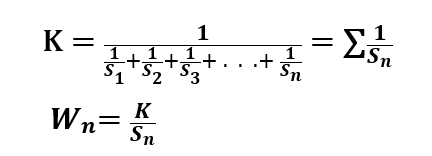

#### 0.0003634637818
#### 0.0004543297272
#### 0.0009086594545
#### 0.006057729696
#### 0.01514432424
#### 0.02138022246
#### 0.01817318909
#### 0.3634637818
#### 0.006057729696
#### 0.1817318909
#### 0.1817318909
#### 0.001211545939
#### 0.01817318909
#### 0.002423091879
#### 0.1817318909
#### 0.000993070442

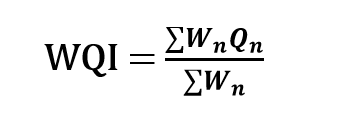

In [ ]:
data['weight_tds']= (data.qn_tds * 0.0003634637818)
data['weight_sulphate']= (data.qn_sulphate * 0.0004543297272)
data['weight_sodium']= (data.qn_sodium * 0.0009086594545)
data['weight_silica']= (data.qn_silica * 0.006057729696)
data['weight_potassium']= (data.qn_potassium * 0.01514432424)
data['weight_pH']= (data.qn_pH * 0.02138022246)
data['weight_nitrate']= (data.qn_nitrate * 0.01817318909)
data['weight_MANGANESE']= (data.qn_MANGANESE * 0.3634637818)
data['weight_MAGNESIUM']= (data.qn_MAGNESIUM * 0.006057729696)
data['weight_IRON']=( data.qn_IRON * 0.1817318909)
data['weight_FLUORIDE']= (data.qn_FLUORIDE * 0.1817318909)
data['weight_CHLORIDE']= (data.qn_CHLORIDE * 0.001211545939)
data['weight_CARBONDIOXIDE']= (data.qn_CARBONDIOXIDE * 0.01817318909)
data['weight_CALCIUM']= (data.qn_CALCIUM * 0.002423091879)
data['weight_BORON']= (data.qn_BORON * 0.1817318909)
data['weight_BICARBONATE']= (data.qn_BICARBONATE * 0.000993070442)
data['wqi']=data.weight_tds+data.weight_sulphate+data.weight_sodium+data.weight_silica+data.weight_potassium+data.weight_pH+data.weight_nitrate+data.weight_MANGANESE+data.weight_MAGNESIUM+data.weight_IRON+data.weight_FLUORIDE+data.weight_CHLORIDE+data.weight_CARBONDIOXIDE+data.weight_CALCIUM+data.weight_BORON+data.weight_BICARBONATE
data

,SL,DISTRICT,UPAZILA,WELL ID,OLD ID,DATETIME,year,TEMPERATURE,PH,TDS,CALCIUM,MAGNESIUM,SODIUM,POTASSIUM,CHLORIDE,BICARBONATE,SULPHATE,NITRATE,IRON,MANGANESE,BORON,SILICA,FLUORIDE,CARBONDIOXIDE,qn_tds,qn_sulphate,qn_sodium,qn_silica,qn_potassium,qn_pH,qn_nitrate,qn_MANGANESE,qn_MAGNESIUM,qn_IRON,qn_FLUORIDE,qn_CHLORIDE,qn_CARBONDIOXIDE,qn_CALCIUM,qn_BORON,qn_BICARBONATE,weight_tds,weight_sulphate,weight_sodium,weight_silica,weight_potassium,weight_pH,weight_nitrate,weight_MANGANESE,weight_MAGNESIUM,weight_IRON,weight_FLUORIDE,weight_CHLORIDE,weight_CARBONDIOXIDE,weight_CALCIUM,weight_BORON,weight_BICARBONATE,wqi
0,134,Chattogram,Satkania,GQ1582095,CHWQ095,06/12/2019,2019,26.4,6.67,534.0,32.05,17.85,285.43,3.38,25.2,60.0,2.0,0.40,0.49,0.58,0.83,49.23,0.23,69,106.80,0.50,142.715,164.100000,28.166667,703.882353,4.0,116.0,59.500000,49.0,23.0,16.800000,690.0,42.733333,83.0,32.786885,0.038818,0.000227,0.129679,0.994073,0.426565,15.049161,0.072693,42.161799,0.360435,8.904863,4.179833,0.020354,12.539500,0.103547,15.083747,0.032560,100.097855
1,133,Chattogram,Satkania,GQ1582095,CHWQ095,30/11/2019,2019,26.2,9.08,375.2,32.35,17.81,285.01,3.26,13.8,90.0,1.0,0.40,0.56,0.59,0.83,49.25,0.66,68,75.04,0.25,142.505,164.166667,27.166667,675.529412,4.0,118.0,59.366667,56.0,66.0,9.200000,680.0,43.133333,83.0,49.180328,0.027274,0.000114,0.129489,0.994477,0.411421,14.442969,0.072693,42.888726,0.359627,10.176986,11.994305,0.011146,12.357769,0.104516,15.083747,0.048840,109.104098
2,132,Chattogram,Satkania,GQ1582095,CHWQ095,21/10/2019,2019,26.3,7.05,508.9,32.20,18.36,286.98,3.12,40.1,200.0,1.0,0.30,1.95,0.60,0.84,50.25,0.61,66,101.78,0.25,143.490,167.500000,26.000000,699.411765,3.0,120.0,61.200000,195.0,61.0,26.733333,660.0,42.933333,84.0,109.289617,0.036993,0.000114,0.130384,1.014670,0.393752,14.953579,0.054520,43.615654,0.370733,35.437719,11.085645,0.032389,11.994305,0.104031,15.265479,0.108532,134.598498
3,131,Chattogram,Satkania,GQ1582095,CHWQ095,21/09/2019,2019,26.1,7.70,668.5,32.15,18.02,286.80,3.05,52.2,80.0,5.0,0.20,2.61,0.06,0.86,47.50,0.51,65,133.70,1.25,143.400,158.333333,25.416667,691.764706,2.0,12.0,60.066667,261.0,51.0,34.800000,650.0,42.866667,86.0,43.715847,0.048595,0.000568,0.130302,0.959141,0.384918,14.790083,0.036346,4.361565,0.363868,47.432024,9.268326,0.042162,11.812573,0.103870,15.628943,0.043413,105.406696
4,130,Chattogram,Satkania,GQ1582095,CHWQ095,21/08/2019,2019,27.3,7.40,570.5,32.05,17.92,284.70,3.02,52.9,55.0,5.0,0.30,2.05,0.07,0.87,47.62,0.58,69,114.10,1.25,142.350,158.733333,25.166667,695.294118,3.0,14.0,59.733333,205.0,58.0,35.266667,690.0,42.733333,87.0,30.054645,0.041471,0.000568,0.129348,0.961564,0.381132,14.865543,0.054520,5.088493,0.361848,37.255038,10.540450,0.042727,12.539500,0.103547,15.810675,0.029846,98.206269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,5,Chattogram,Anwara,GQ1504094,CHWQ094,05/01/2014,2014,30.9,6.89,142.0,86.00,17.85,286.80,23.47,440.0,371.0,6.0,5.00,1.20,0.60,0.83,49.21,1.26,50,28.40,1.50,143.400,164.033333,195.583333,701.294118,50.0,120.0,59.500000,120.0,126.0,293.333333,500.0,114.666667,83.0,202.732240,0.010322,0.000681,0.130302,0.993670,2.961977,14.993824,0.908659,43.615654,0.360435,21.807827,22.898218,0.355387,9.086595,0.277848,15.083747,0.201327,133.686474
140,4,Chattogram,Anwara,GQ1504094,CHWQ094,04/01/2014,2014,30.4,6.89,142.0,86.00,17.81,286.72,23.52,440.0,370.0,6.0,5.00,1.22,0.80,0.83,49.21,1.24,50,28.40,1.50,143.360,164.033333,196.000000,701.294118,50.0,160.0,59.366667,122.0,124.0,293.333333,500.0,114.666667,83.0,202.185792,0.010322,0.000681,0.130265,0.993670,2.968288,14.993824,0.908659,58.154205,0.359627,22.171291,22.534754,0.355387,9.086595,0.277848,15.083747,0.200785,148.229949
141,3,Chattogram,Anwara,GQ1504094,CHWQ094,03/01/2014,2014,29.3,6.83,143.0,85.00,17.73,286.68,23.69,440.0,370.0,6.0,4.9

# Classification of water quality status based on water quality index

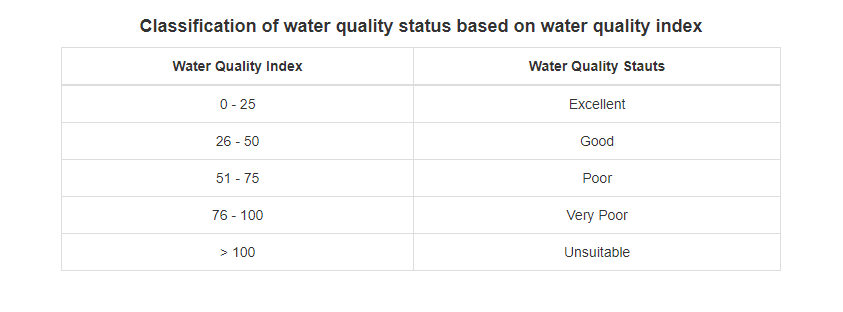

In [ ]:
data.to_csv('wqi.csv')